In [22]:
import large_image
import histomicstk
import os
import matplotlib.pyplot as plt
from PIL import Image
from shutil import copyfile
import numpy as np

In [17]:
slide_path = "E:\\deeplearning\\Hepatocarcinomes\\slides_annotations_hammamatsu"
res_path = "E:\\deeplearning\\Hepatocarcinomes\\SlidesClassification"
out_path = "E:\\deeplearning\\Hepatocarcinomes\\TestData"

nslide = "HMNT0001"

In [77]:
# Load WSI
ts = large_image.getTileSource(os.path.join(slide_path, nslide)+".ndpi")
print(ts.getMetadata())
um_pp = ts.getMetadata()['mm_x']/0.001

{'levels': 9, 'sizeX': 59520, 'sizeY': 41216, 'tileWidth': 256, 'tileHeight': 256, 'magnification': 20.0, 'mm_x': 0.0004576659038901602, 'mm_y': 0.0004576659038901602}


In [112]:
im = ts.getRegion(
    region=dict(left=25600, top=25600, width=25600, height=25600, units='base_pixels'),
    scale=dict(magnification=20),
    format=large_image.tilesource.TILE_FORMAT_NUMPY
)[0][:,:,:3]
print(im.shape)
Image.fromarray(im).save(os.path.join(out_path, "4.tiff"))

(15616, 25600, 3)


In [88]:
copyfile(os.path.join(res_path, nslide)+"_macro.png", os.path.join(out_path, "macro.png"))
copyfile(os.path.join(res_path, nslide)+"_annotation.png", os.path.join(out_path, "annotation.png"))
copyfile(os.path.join(res_path, nslide)+"_PbMap8bit.png", os.path.join(out_path, "PbMap8bit.png"))
copyfile(os.path.join(res_path, nslide)+"_PbMap8bit_plasma.png", os.path.join(out_path, "PbMap8bit_plasma.png"))

'E:\\deeplearning\\Hepatocarcinomes\\TestData\\macro.png'

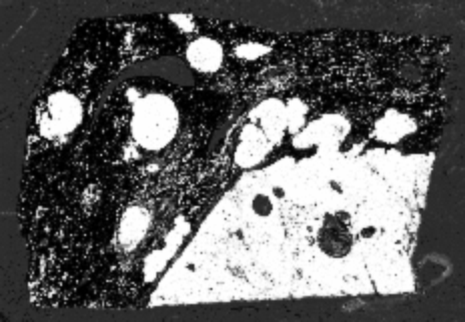

(322, 465)


In [23]:
prob = Image.open(os.path.join(res_path, nslide)+"_PbMap8bit.png")
display(prob)
print(np.array(prob).shape) # invert, 128

In [113]:
tile = np.array(prob)[200:400, 200:400]
Image.fromarray(tile).save(os.path.join(out_path, "4_PbMap8bit.png"))

In [114]:
anno = Image.open(os.path.join(res_path, nslide)+"_annotation.png")
print(np.array(anno).shape)

(161, 232)


In [115]:
anno = anno.resize((465, 322),Image.ANTIALIAS)
print(np.array(anno).shape)
anno = np.array(anno)[200:400, 200:400] # invert
Image.fromarray(anno).save(os.path.join(out_path, "4_annotation.png"))

(322, 465)


In [116]:
indices = np.where(tile >= 150)
coord = zip(indices[1], indices[0])
unique_coord = sorted(list(set(list(coord))))
print(unique_coord[:10])

[(0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34)]


In [117]:
coord_base = zip(indices[1]*128, indices[0]*128)
unique_coord_base = sorted(list(set(list(coord_base))))
print((unique_coord_base)[:10])

[(0, 3200), (0, 3328), (0, 3456), (0, 3584), (0, 3712), (0, 3840), (0, 3968), (0, 4096), (0, 4224), (0, 4352)]


In [118]:
with open(os.path.join(out_path, "4_base_pixel.txt"), 'a') as file:
    for pair in unique_coord_base:
        file.write(str(pair)+'\n')

In [119]:
coord_um = zip(indices[1]*128*um_pp, indices[0]*128*um_pp)
unique_coord_um = sorted(list(set(list(coord_um))))
print((unique_coord_um)[:10])

[(0.0, 1464.5308924485128), (0.0, 1523.1121281464532), (0.0, 1581.6933638443936), (0.0, 1640.2745995423343), (0.0, 1698.8558352402747), (0.0, 1757.4370709382151), (0.0, 1816.0183066361558), (0.0, 1874.5995423340962), (0.0, 1933.1807780320366), (0.0, 1991.7620137299773)]


In [120]:
with open(os.path.join(out_path, "4_um.txt"), 'a') as file:
    for pair in unique_coord_um:
        file.write(str(pair)+'\n')